# Chapter 2.3

Dang Thanh Vu
ID: 197796

In [68]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def random_MixtureGaussian(N, P, m, S, cl):
    d = m.shape[1]
    c = m.shape[0]
    z = np.random.choice(np.arange(0,c), N, p=P)
    X = np.ones([1,d])
    for i in range(0,c):
        n = np.sum(z == np.array([i]*N))
        x = np.random.multivariate_normal(m[i], S[i], n)
        X = np.concatenate([X, x])
    X = X[1:]
    Y = cl*np.array(N*[1])
    return X, Y

def Bayes_Normal_classifier(X_test, Y_test, Priors, mus, sigmas):
    k = Priors.shape[0]
    n = X_test.shape[0]
    P = np.zeros([1, n])
    for i in range(k):
        prob = Priors[i]*multivariate_normal.pdf(X_test, mus[i], sigmas[i])
        P = np.concatenate([P, np.array([prob])])
    P = P[1:]

    predict = np.argmax(P, axis=0)
    acc = np.sum(predict == Y_test)/(n)
    return acc, predict

def Multiclass_LS_classifier(n_class, X, Y, c):
    m,n = X.shape[:]
    X_train = np.ones((m, n + 1))
    X_train[:,:-1] = X
    I = np.identity(n+1)
    W = []
    for i in range(0, n_class):
        Y_train = np.zeros(m)
        Y_train[np.where(Y == i)] = 1
        Y_train[np.where(Y != i)] = 0
        W_sub = np.dot(np.dot(np.linalg.inv(np.dot(X_train.T, X_train) + c*I), X_train.T), Y_train.T)
        W.append(W_sub.T)
    return np.array(W)

def predict_Multiclass_LS_classifier(W, X, Y):
    n_class = W.shape[0]
    m,n = X.shape[:]
    X_test = np.ones((m, n + 1))
    X_test[:,:-1] = X
    Y_test = np.dot(X_test, W.T)
    Y_predict = np.argmax(Y_test, axis=1)
    return (np.sum(Y_predict == Y.T))/m
        
        

# Exercise 2.3.1

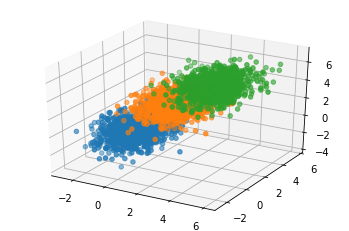

In [78]:
m1 = np.array([[0, 0, 0]])
m2 = np.array([[1, 2, 2]])
m3 = np.array([[3, 3, 4]])
S = np.array([[[0.8, 0.2, 0.1], [0.2, 0.8, 0.2], [0.1, 0.2, 0.8]]])
P = np.array([1])
N = 1000

X1, Y1 = random_MixtureGaussian(N, P, m1, S, 0)
X2, Y2 = random_MixtureGaussian(N, P, m2, S, 1)
X3, Y3 = random_MixtureGaussian(N, P, m3, S, 2)
X_train = np.concatenate([X1, X2, X3])
Y_train = np.concatenate([Y1, Y2, Y3])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1[:,0], X1[:,1], X1[:,2])
ax.scatter(X2[:,0], X2[:,1], X2[:,2])
ax.scatter(X3[:,0], X3[:,1], X3[:,2])
plt.show()

X1_test, Y1_test = random_MixtureGaussian(N, P, m1, S, 0)
X2_test, Y2_test = random_MixtureGaussian(N, P, m2, S, 1)
X3_test, Y3_test = random_MixtureGaussian(N, P, m3, S, 2)


In [79]:
W = Multiclass_LS_classifier(3, X_train, Y_train, 0)
X_test = np.concatenate([X1_test, X2_test, X3_test])
Y_test = np.concatenate([Y1_test, Y2_test, Y3_test])
acc = predict_Multiclass_LS_classifier(W, X_test, Y_test)
print("Multi linear: ", acc)

Priors = np.array([1/3, 1/3, 1/3])
m1 = np.mean(X1, axis=0)
m2 = np.mean(X2, axis=0)
m3 = np.mean(X3, axis=0)
S1 = np.cov(X1.T)
S2 = np.cov(X2.T)
S3 = np.cov(X3.T)
acc, _ = Bayes_Normal_classifier(X_test, Y_test, Priors, np.array([m1, m2, m3]), np.array([S1, S2, S3]))
print("Bayes: ", acc)

Multi linear:  0.809
Bayes:  0.9023333333333333
